/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:387: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RMSE of NO2 using KNN regressor with K=20 3.5356173902749153
MAE of NO2 using KNN regressor with K=20 2.129498351701779
Time Taken 85.26880407333374


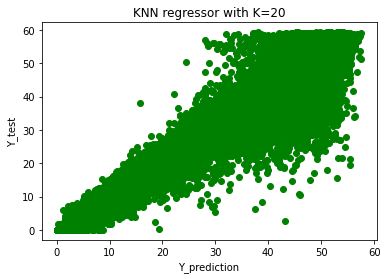

RMSE of NO2 for the actual function used 3.054777105893083
MAE of NO2 for the actual function used 1.1653298600901347
Time Taken 86.52270412445068


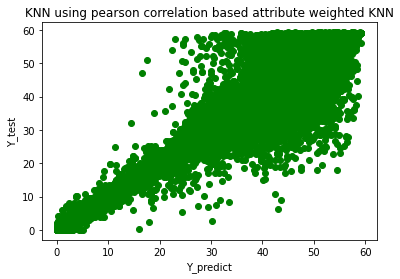

NEW METHOD RMSE:2.1446647756202277
Mean Absolute Error 0.7744911433384998
Time taken 270.8476526737213


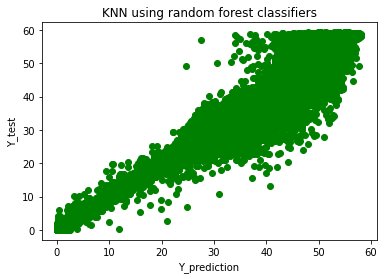

In [13]:
import numpy as np
import pandas as pd
import time
import math
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import random
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors.regression import KNeighborsRegressor, check_array, _get_weights
from sklearn.preprocessing import KBinsDiscretizer
from math import log2
from math import log
import matplotlib.pyplot as plt
from statistics import median
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
# from feature_engine.discretisers import EqualWidthDiscretiser
class MedianKNNRegressor(KNeighborsRegressor):
    def predict(self, X):
        X = check_array(X, accept_sparse='csr')

        neigh_dist, neigh_ind = self.kneighbors(X)

        weights = _get_weights(neigh_dist, self.weights)

        _y = self._y
        if _y.ndim == 1:
            _y = _y.reshape((-1, 1))

        ######## Begin modification
        if weights is None:
            y_pred = np.median(_y[neigh_ind], axis=1)
        else:
            # y_pred = weighted_median(_y[neigh_ind], weights, axis=1)
            raise NotImplementedError("weighted median")
        ######### End modification

        if self._y.ndim == 1:
            y_pred = y_pred.ravel()

        return y_pred    

# [  2.38172861  13.3871126    9.6737255    2.77561858  17.07392584]
# # APPLYING PSO
def WeightedAverage(neighbors2,distance2,a,b,neighbors,distance,test,w,X_train,X_temp1,X_temp2,Y_train3,Y_train2,Y_train,coeff,val,c):
  # We calculate weights considering y<8
  # c determines which model to be used
  if True: #c==0
    similar=[]
    total=0
    counter=0
    y=0
    n=[]
    d=[]
    x=[]
    z=1
    # print(neighbors)
    # print(distance)

    for i in distance:
      for k in i:
        d.append(k)
        x.append(k)
    for i in neighbors:
      for k in i:
        n.append(k)
        x.append(k)
    # DUAL WEIGHTING FUNCTION
    arr=np.array(x)
    h=arr.reshape((2,val))
    h=h[:,h[0].argsort()]
    columns=list(X_train)
    # h is a 2d array with the first row storing distance, and the second row storing their correspoding indices
    flag=0
    ans=[]
    for i in h[0]:
      if h[0][val-1]!=h[0][0]:
        flag=1
        # z=((h[0][19]-i)/(h[0][19]-h[0][0]))*((h[0][19]+h[0][0])/(h[0][19]+i))
        z=((h[0][val-1]-i)/(h[0][val-1]-h[0][0]))/(i+1)
        similar.append(z)
      # total+=k
      else:
        y=Y_train['NO2'].iloc[int(h[1,0])]
    if flag==1:  
      j=0
      for r in similar:
        total+=r
      # print(neighbors)
      for i in h[1]:
        # print(Y_train['NO'].iloc[i])
        # print("Similar:")
        # print(similar[j]/total)
        # print(total)
        # print(h)
        # print(h[1,j])
        if Y_train['NO2'].iloc[int(h[1,j])]>8:
          counter+=1
        y+=Y_train['NO2'].iloc[int(h[1,j])]*(similar[j]/total)
        j+=1

    # return y

#  We now calculate y considering y>8
  if True :  #c==1
    similar=[]
    total=0
    y1=0
    n=[]
    d=[]
    x=[]
    ans=[]
    z=1
    # print(neighbors)
    # print(distance)
    # val=50
    for i in b:
      for k in i:
        d.append(k)
        x.append(k)
    for i in a:
      for k in i:
        n.append(k)
        x.append(k)
    # DUAL WEIGHTING FUNCTION
    arr=np.array(x)
    h=arr.reshape((2,val))
    h=h[:,h[0].argsort()]
    columns=list(X_train)
    # h is a 2d array with the first row storing distance, and the second row storing their correspoding indices
    flag=0
    ans=[]
    for i in h[0]:
      if h[0][val-1]!=h[0][0]:
        flag=1
        z=((h[0][val-1]-i)/(h[0][val-1]-h[0][0]))*((h[0][val-1]+h[0][0])/(h[0][val-1]+i))
        # z=((h[0][val-1]-i)/(h[0][val-1]-h[0][0]))/(i+1)
        similar.append(z)
      # total+=k
      else:
        y1=Y_train2['NO2'].iloc[int(h[1,0])]
    if flag==1:  
      j=0
      for r in similar:
        total+=r
      # print(neighbors)
      for i in h[1]:
        ans.append(Y_train2['NO2'].iloc[int(h[1,j])])
        y1+=Y_train2['NO2'].iloc[int(h[1,j])]*(similar[j]/total)

        j+=1


    # return y1
  if True: #c==2
    similar=[]
    total=0
    counter=0
    y2=0
    n=[]
    d=[]
    x=[]
    z=1
    # print(neighbors)
    # print(distance)

    for i in distance2:
      for k in i:
        d.append(k)
        x.append(k)
    for i in neighbors2:
      for k in i:
        n.append(k)
        x.append(k)
    # DUAL WEIGHTING FUNCTION
    arr=np.array(x)
    h=arr.reshape((2,val))
    h=h[:,h[0].argsort()]
    columns=list(X_train)
    # h is a 2d array with the first row storing distance, and the second row storing their correspoding indices
    flag=0
    ans=[]
    for i in h[0]:
      if h[0][val-1]!=h[0][0]:
        flag=1
        # z=((h[0][19]-i)/(h[0][19]-h[0][0]))*((h[0][19]+h[0][0])/(h[0][19]+i))
        z=((h[0][val-1]-i)/(h[0][val-1]-h[0][0]))/(i+1)
        similar.append(z)
      # total+=k
      else:
        y2=Y_train3['NO2'].iloc[int(h[1,0])]
    if flag==1:  
      j=0
      for r in similar:
        total+=r
      # print(neighbors)
      for i in h[1]:
        # print(Y_train['NO'].iloc[i])
        # print("Similar:")
        # print(similar[j]/total)
        # print(total)
        # print(h)
        # print(h[1,j])
        if Y_train3['NO2'].iloc[int(h[1,j])]>8:
          counter+=1
        y2+=Y_train3['NO2'].iloc[int(h[1,j])]*(similar[j]/total)
        j+=1

  result=0
  return c[0]*y+c[1]*y1+c[2]*y2
  # return (y+y1+y2)/3



a_time=time.time()
df=pd.read_csv('/content/drive/MyDrive/SID 2-2/CS F266_ML/PAPER-1/DATA/LaqnData 2014-2015.csv')
df2=pd.read_csv('/content/drive/MyDrive/SID 2-2/CS F266_ML/PAPER-1/DATA/LaqnDataPart2data.csv')
df3=pd.read_csv('/content/drive/MyDrive/SID 2-2/CS F266_ML/PAPER-1/DATA/LaqnData  2015-2017.csv')
df4=pd.read_csv('/content/drive/MyDrive/SID 2-2/CS F266_ML/PAPER-1/DATA/LaqnData 2015-2017Part2.csv')
df5=pd.read_csv('/content/drive/MyDrive/SID 2-2/CS F266_ML/PAPER-1/DATA/LaqnData 2017-2019.csv')
df6=pd.read_csv('/content/drive/MyDrive/SID 2-2/CS F266_ML/PAPER-1/DATA/LaqnData 2017-2019Part2.csv')
df1=pd.DataFrame()
df7=pd.DataFrame()
BP=[]

NO=[]
NO2=[]
NOX=[]
RAIN=[]
RHUM=[]
SOLR=[]
SO2=[]
WDIR=[]
WSPD=[]

for i in df2.index:
    if df2['Species'][i]=='SOLR':
        SOLR.append(df2['Value'][i])
    if df2['Species'][i]=='SO2':
        SO2.append(df2['Value'][i])
    if df2['Species'][i]=='WDIR':
        WDIR.append(df2['Value'][i])
    if df2['Species'][i]=='WSPD':
        WSPD.append(df2['Value'][i])

for i in df.index:
    if df['Species'][i]=='BP':
        BP.append(df['Value'][i])
        
    if df['Species'][i]=='NO':
        NO.append(df['Value'][i])
    if df['Species'][i]=='NO2':
        NO2.append(df['Value'][i])
    if df['Species'][i]=="NOX":
        NOX.append(df['Value'][i])
    if df['Species'][i]=='RAIN':
        RAIN.append(df['Value'][i])
    if df['Species'][i]=='RHUM':
        RHUM.append(df['Value'][i])
for i in df4.index:
    if df4['Species'][i]=='SOLR':
        SOLR.append(df4['Value'][i])
    if df4['Species'][i]=='SO2':
        SO2.append(df4['Value'][i])
    if df4['Species'][i]=='WDIR':
        WDIR.append(df4['Value'][i])
    if df4['Species'][i]=='WSPD':
        WSPD.append(df4['Value'][i])

for i in df3.index:
    if df3['Species'][i]=='BP':
        BP.append(df3['Value'][i])
        
    if df3['Species'][i]=='NO':
        NO.append(df3['Value'][i])
    if df3['Species'][i]=='NO2':
        NO2.append(df3['Value'][i])
    if df3['Species'][i]=="NOX":
        NOX.append(df3['Value'][i])
    if df3['Species'][i]=='RAIN':
        RAIN.append(df3['Value'][i])
    if df3['Species'][i]=='RHUM':
        RHUM.append(df3['Value'][i])
for i in df6.index:
    if df6['Species'][i]=='SOLR':
        SOLR.append(df6['Value'][i])
    if df6['Species'][i]=='SO2':
        SO2.append(df6['Value'][i])
    if df6['Species'][i]=='WDIR':
        WDIR.append(df6['Value'][i])
    if df6['Species'][i]=='WSPD':
        WSPD.append(df6['Value'][i])

for i in df5.index:
    if df5['Species'][i]=='BP':
        BP.append(df5['Value'][i])
        
    if df5['Species'][i]=='NO':
        NO.append(df5['Value'][i])
    if df5['Species'][i]=='NO2':
        NO2.append(df5['Value'][i])
    if df5['Species'][i]=="NOX":
        NOX.append(df5['Value'][i])
    if df5['Species'][i]=='RAIN':
        RAIN.append(df5['Value'][i])
    if df5['Species'][i]=='RHUM':
        RHUM.append(df5['Value'][i])

#df1['ReadingDateTime']=date
df7['BP']=BP
df7['NO']=NO
df7['NO2']=NO2
df7['NOX']=NOX
df7['RAIN']=RAIN
df7['SOLR']=SOLR
df7['SO2']=SO2
df7['SOLR']=SOLR
df7['WDIR']=WDIR
df7['WSPD']=WSPD
df1=df7[df7.isnull().sum(axis=1)>=0]
df1[df1 < 0]=float('NaN')
#Removing outliers using boxplot
columns=list(df1)
for i in columns:
  j=0
  Q1=df1[i].quantile(0.25)
  Q3=df1[i].quantile(0.75)
  IQR=Q3-Q1
  for k in df1[i]:
    if(k<Q1-(1.5*IQR) or k>Q3+(1.5*IQR)):
      df1[i][j]=float("NaN")
    j+=1
# print(df1.tail())
# Interpolation done to fill NaN
df1.interpolate(limit_direction='both',inplace=True)

# print(df1.tail())

X=df1[['BP','SO2','NO','NOX','SOLR','WDIR','WSPD']]
Y=df1[['NO2']]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)
b_time=time.time()
# X_train,X_val,Y_train,Y_val=train_test_split(X_train,Y_train,test_size=0.25)
data=[]
data1=[]
data2=[]
data3=[]
data4=[]
data5=[]
classifier=[]
for (a,b,c,d,e,f,g,h) in zip(X_train['BP'],X_train['SO2'],X_train['NO'],X_train['NOX'],X_train['SOLR'],X_train['WDIR'],X_train['WSPD'],Y_train['NO2']):
  if h>40:
    classifier.append(1)
    arr=[a,b,c,d,e,f,g]
    arr1=[h]
    data.append(arr)
    data1.append(arr1)
  elif h>20:
    arr=[a,b,c,d,e,f,g]
    arr1=[h]
    data2.append(arr)
    data3.append(arr1)
    classifier.append(0)
  else:
    arr=[a,b,c,d,e,f,g]
    arr1=[h]
    data4.append(arr)
    data5.append(arr1)
    classifier.append(2)
# Code to determine which model to be used 
# HERE A RANDOM FOREST CLASSIFIER IS USED TO DETERMINE WHETHER Y_PREDICT IS GREATER THAN OR LESS THAN 8
# IN ORDER TO USE RANDOM FOREST WE HAVE TO CREATE ANOTHER SERIES WHICH IS 1 WHEN GREATER THAN 8, 0 OTHERWISE
# IN GENERAL THE BETTER THE CLASSIFICATION PERFORMANCE, THE BETTER THE ACCURACY
# X_train is split into X_train2 (>8) and X_train3 (<8) 
Z=pd.DataFrame()
Z['Classifier']=classifier
lr=RandomForestClassifier()
# lr=GradientBoostingClassifier(n_estimators=100,learning_rate=0.1,max_depth=1,random_state=0)
lr.fit(X_train,Z)
c_pred=lr.predict_proba(X_test)
c_test=[]
for j in Y_test['NO2']:
  if j>40:
    c_test.append(1)
  elif j>20:
    c_test.append(0)
  else:
    c_test.append(2)

# print("Classification accuracy")
# print(mean_squared_error(c_test,c_pred,squared=False))
X_train4=pd.DataFrame(data4,columns=['BP','SO2','NO','NOX','SOLR','WDIR','WSPD'])
Y_train4=pd.DataFrame(data5,columns=['NO2'])
X_train3=pd.DataFrame(data2,columns=['BP','SO2','NO','NOX','SOLR','WDIR','WSPD'])
Y_train3=pd.DataFrame(data3,columns=['NO2'])
X_train2=pd.DataFrame(data,columns=['BP','SO2','NO','NOX','SOLR','WDIR','WSPD'])
Y_train2=pd.DataFrame(data1,columns=['NO2'])
# print("Y_train > 8")
# print(Y_train2)
# print("complete")
c_time=time.time()
columns=list(X_train)
knn_normal=KNeighborsRegressor(n_neighbors=20)
knn_normal.fit(X_train,Y_train)

y_p=knn_normal.predict(X_test)
d_time=time.time()
print(f"RMSE of NO2 using KNN regressor with K=20 {mean_squared_error(Y_test,y_p,squared=False)}")
print(f"MAE of NO2 using KNN regressor with K=20 {mean_absolute_error(Y_test,y_p)}")
print(f"Time Taken {d_time-c_time+b_time-a_time}")

plt.scatter(y_p,Y_test,color="green")
plt.xlabel("Y_prediction")
plt.ylabel("Y_test")
plt.title("KNN regressor with K=20")
plt.show()
X_temp1=X_train.copy()
X_test_temp1=X_test.copy()
power=1
w=[]
j=0

e_time=time.time()
for i in columns:
  r,p=pearsonr(X_train[i],Y_train['NO2'])
  w.append(round(abs(r)/(1-abs(r)),3))
  X_temp1[i]=X_train[i]*w[j]
  X_test_temp1[i]=X_test[i]*w[j] 
  j+=1
knn=KNeighborsRegressor()
knn.fit(X_temp1,Y_train)
y_predict=knn.predict(X_test_temp1)
f_time=time.time()
print(f"RMSE of NO2 for the actual function used {mean_squared_error(Y_test,y_predict,squared=False)}")
print(f"MAE of NO2 for the actual function used {mean_absolute_error(Y_test,y_predict)}")
print(f"Time Taken {d_time-c_time+b_time-a_time+f_time-e_time}")
plt.scatter(y_predict,Y_test,color="green")
plt.xlabel("Y_predict")
plt.ylabel("Y_test")
plt.title("KNN using pearson correlation based attribute weighted KNN")
plt.show()

# print(X_train2.size)
X_temp=X_train3.copy()
X_test_temp=X_test.copy()

X_temp1=X_train2.copy()
X_test_temp1=X_test.copy()

X_temp2=X_train4.copy()
X_test_temp2=X_test.copy()
power=1
j=0
sum=1
min=100
# THESE WEIGHTS ARE USED WHEN Y<8:
w=[1.4142761470767127,1.9222836213057315,3.9170841794343922,4.320224957946431,2.602748429465474,2.2010924466552417,0.9630329415390468]
# w=[1.1744914941414777,1.712950359199092,3.3202702059273026,3.454558821851364,2.287170169939757,1.8277324083078206,0.8290917792767729]
# THESE WEIGHTS ARE USED WHEN Y>=8
w2=[2.671683197407887, 2.7159323862302873, 5.903471658342079, 6.965753340717679, 3.7892712911709623, 4.140704621583484, 1.6207359256559322]
j=0
coeff=[]
for i in columns:
  r,p=pearsonr(X_train[i],Y_train['NO2'])
  # print(r)
  
  r=abs(r)/(1-abs(r))
  coeff.append(r)
  # w.append(round((pow(abs(r),0.5))/(1-abs(r)),3))
  #   sum+=w[j]
        
# for i in columns:
  # w[j]=abs(r)*w[j]
  # if w[j]*r>w[j]:
    # w[j]=r*w[j]
  w[j]=pow(w[j],10)
  w2[j]=pow(w2[j],10)
  X_temp[i]=X_train3[i]*(w[j])
  X_temp1[i]=X_train2[i]*w2[j] #w2
  X_temp2[i]=X_train4[i]*w[j]
  X_test_temp2[i]=X_test[i]*w[j]
  X_test_temp1[i]=X_test[i]*w2[j] #w2
  X_test_temp[i]=X_test[i]*(w[j]) 
  j+=1
# print(w)
# CREATING NEW DATAFRAME TO INFOGAIN WHERE NO VALUES ARE GREATER THAN 8
rneighNew=NearestNeighbors(n_neighbors=20)
rneighNew.fit(X_temp2)
rneigh=NearestNeighbors(n_neighbors=20)
rneigh.fit(X_temp1)
neigh=NearestNeighbors(n_neighbors=20)
neigh.fit(X_temp) # y>4
y_prediction=[]

for (j,k,l,m,n,p,q,r,s,t,u,v,g,h,j1,k1,l1,m1,n1,p1,q1,c) in zip(X_test_temp['BP'],X_test_temp['SO2'],X_test_temp['NO'],X_test_temp['NOX'],X_test_temp['SOLR'],X_test_temp['WDIR'],X_test_temp['WSPD'],X_test_temp1['BP'],X_test_temp1['SO2'],X_test_temp1['NO'],X_test_temp1['NOX'],X_test_temp1['SOLR'],X_test_temp1['WDIR'],X_test_temp1['WSPD'],X_test_temp['BP'],X_test_temp['SO2'],X_test_temp['NO'],X_test_temp['NOX'],X_test_temp['SOLR'],X_test_temp['WDIR'],X_test_temp['WSPD'],c_pred):
  a=[j,k,l,m,n,p,q]
  b=[r,s,t,u,v,g,h]
  z=[j1,k1,l1,m1,n1,p1,q1]
  arr2=np.reshape(z,(1,len(z)))
  arr1=np.reshape(b,(1,len(b)))
  arr=np.reshape(a,(1,len(a)))
  dist,n=neigh.kneighbors(arr) # y>4 
  dist1,n1=rneigh.kneighbors(arr1)
  dist2,n2=rneighNew.kneighbors(arr2)
  y_prediction.append(WeightedAverage(n2,dist2,n1,dist1,n,dist,a,w,X_temp,X_temp1,X_temp2,Y_train4,Y_train2,Y_train3,coeff,20,c))
g_time=time.time()
print(f"NEW METHOD RMSE:{mean_squared_error(Y_test,y_prediction,squared=False)}")
# print(Y_test.size)
# print(y_prediction)
# index=0
# for i in Y_test['NO']:
#   if y_prediction[index]>8:
#     y_prediction[index]=i
#   index+=1
ans=mean_squared_error(Y_test,y_prediction,squared=False)

# if ans<min:
  # ans=min
  # s1=10
  # s2=b 

# print(ans)
print(f"Mean Absolute Error {mean_absolute_error(Y_test,y_prediction)}")
print(f"Time taken {c_time-a_time+g_time-f_time}")
# print(mean_absolute_error(Y_test,y_prediction))
# print(s1)
# print(s2)
knn=KNeighborsRegressor(n_neighbors=20,algorithm='ball_tree')
knn.fit(X_train,Y_train)
y_predict=knn.predict(X_test)
# print(f"MSE of NO for the new function used {mean_squared_error(Y_test,y_predict,squared=False)}")
# Method-2 Part
# r=[1,1,1,1,1,1,1]
# w=pso(r,1.1,0.1,100,X,Y,25,5)
# print(w)
# j=0
# for i in columns:
#   X_temp[i]=X_train[i]*w[j]
#   X_test_temp[i]=X_test[i]*w[j]
#   j+=1
# print(X_train.head())
 
#print(f"Final best MSE {mean_squared_error(Y_test,y_p,squared=False)}")
#Method 2 part


plt.scatter(y_prediction,Y_test,color="green")
plt.xlabel("Y_prediction")
plt.ylabel("Y_test")
plt.title("KNN using random forest classifiers")
# plt.scatter(X_test_temp['BP'],y_prediction,color="red")
plt.show()
# Information Gain THE CODE BELOW IS ONLY USED TO OBTAIN WEIGHTS
# Calculating entropy of target variable
# ind=0
# # arr=[]
# for j in Y_train['NO']:
#   if j<8:
#     X_train.drop(X_train.index[ind],inplace=True)
#     Y_train.drop(Y_train.index[ind],inplace=True)
#   else:  
#     ind+=1
# mask=df1['NO'] >= 8
# dtf=df1[~mask] 
# print("dataframe")
# print(dtf)     # dataframe with values lesser than 8
# X=dtf[['BP','SO2','NO2','NOX','SOLR','WDIR','WSPD']]
# Y=dtf[['NO']]
# X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)
# s=set()
# map={}
# total=Y_train['NO'].size
# entropy=0
# count=[]
# index=0
# for i in Y_train['NO']:
#   if(i not in s):
#     s.add(i)
#     map[i]=index
#     count.append(1)
#     index+=1
#   else:
#     count[map[i]]+=1
# # print(count)
# # print(s)
# for i in count:
#   p=(i/total)
#   entropy+=p*log2(p)
# print(entropy)
# print("hello")
# #Calculate infogain for each attribute
# infoGain=[]


# a=set()
# map_a={}
# count_a=[]
# index_a=0
# b=set()
# map_b={}
# count_b=[]
# index_b=0
# c=set()
# map_c={}
# count_c=[]
# index_c=0
# d=set()
# map_d={}
# count_d=[]
# index_d=0
# e=set()
# map_e={}
# count_e=[]
# index_e=0
# f=set()
# map_f={}
# count_f=[]
# index_f=0
# g=set()
# map_g={}
# count_g=[]
# index_g=0

# for (j,k,l,m,n,p,q) in zip(X_train['BP'],X_train['SO2'],X_train['NO2'],X_train['NOX'],X_train['SOLR'],X_train['WDIR'],X_train['WSPD']):
  # if(j not in a):
  #   a.add(j)
  #   map_a[j]=index_a
  #   count_a.append(1)
  #   index_a+=1
  # else:
  #     count_a[map_a[j]]+=1
  # if(k not in b):
  #   b.add(k)
  #   map_b[k]=index_b
  #   count_b.append(1)
  #   index_b+=1
  # else:
  #     count_b[map_b[k]]+=1
  # if(l not in c):
  #   c.add(l)
  #   map_c[l]=index_c
  #   count_c.append(1)
  #   index_c+=1
  # else:
  #     count_c[map_c[l]]+=1
  # if(m not in d):
  #   d.add(m)
  #   map_d[m]=index_d
  #   count_d.append(1)
  #   index_d+=1
  # else:
  #     count_d[map_d[m]]+=1
  # if(n not in e):
  #   e.add(n)
  #   map_e[n]=index_e
  #   count_e.append(1)
  #   index_e+=1
  # else:
  #     count_e[map_e[n]]+=1
  # if(p not in f):
  #   f.add(p)
  #   map_f[p]=index_f
  #   count_f.append(1)
  #   index_f+=1
  # else:
  #     count_f[map_f[p]]+=1
  # if(q not in g):
  #   g.add(q)
  #   map_g[q]=index_g
  #   count_g.append(1)
  #   index_g+=1
  # else:
  #     count_g[map_g[q]]+=1      
# cc_a=[0 for i in range(len(a)*len(s))]
# cc_b=[0 for i in range(len(b)*len(s))]
# cc_c=[0 for i in range(len(c)*len(s))]
# cc_d=[0 for i in range(len(d)*len(s))]
# cc_e=[0 for i in range(len(e)*len(s))]
# cc_f=[0 for i in range(len(f)*len(s))] 
# cc_g=[0 for i in range(len(g)*len(s))]
# class_counter_a=np.reshape(cc_a,(len(a),len(s)))
# class_counter_b=np.reshape(cc_b,(len(b),len(s)))
# class_counter_c=np.reshape(cc_c,(len(c),len(s)))
# class_counter_d=np.reshape(cc_d,(len(d),len(s)))
# class_counter_e=np.reshape(cc_e,(len(e),len(s)))
# class_counter_f=np.reshape(cc_f,(len(f),len(s)))
# class_counter_g=np.reshape(cc_g,(len(g),len(s)))  
# t=0
# for (j,k,l,m,n,p,q,r) in zip(X_train['BP'],X_train['SO2'],X_train['NO2'],X_train['NOX'],X_train['SOLR'],X_train['WDIR'],X_train['WSPD'],Y_train['NO']):
  # class_counter_a[map_a[j]][map[r]]+=1
  # class_counter_b[map_b[k]][map[r]]+=1
  # class_counter_c[map_c[l]][map[r]]+=1
  # class_counter_d[map_d[m]][map[r]]+=1
  # class_counter_e[map_e[n]][map[r]]+=1
  # class_counter_f[map_f[p]][map[r]]+=1
  # class_counter_g[map_g[q]][map[r]]+=1
  
# entropy_a=0
# for y in range(len(a)):
#   sum=0;
#   entropy_b=0
#   for z in range(len(s)):
#     sum+=class_counter_a[y][z]
#   for z in range(len(s)):
#     p=class_counter_a[y][z]/sum
#     if p!=0:
#       entropy_b+=p*log2(p)
#   entropy_b*=count_a[y]/total
#   entropy_a+=entropy_b
# print(entropy_a)
# infoGain.append(entropy_a)
# entropy_a=0
# for y in range(len(b)):
#   sum=0;
#   entropy_b=0
#   for z in range(len(s)):
#     sum+=class_counter_b[y][z]
#   for z in range(len(s)):
#     p=class_counter_b[y][z]/sum
#     if p!=0:
#       entropy_b+=p*log2(p)
#   entropy_b*=count_b[y]/total
#   entropy_a+=entropy_b
# print(entropy_a)
# infoGain.append(entropy_a)
# entropy_a=0
# for y in range(len(c)):
#   sum=0;
#   entropy_b=0
#   for z in range(len(s)):
#     sum+=class_counter_c[y][z]
#   for z in range(len(s)):
#     p=class_counter_c[y][z]/sum
#     if p!=0:
#       entropy_b+=p*log2(p)
#   entropy_b*=count_c[y]/total
#   entropy_a+=entropy_b
# print(entropy_a)
# infoGain.append(entropy_a)
# entropy_a=0
# for y in range(len(d)):
#   sum=0;
#   entropy_b=0
#   for z in range(len(s)):
#     sum+=class_counter_d[y][z]
#   for z in range(len(s)):
#     p=class_counter_d[y][z]/sum
#     if p!=0:
#       entropy_b+=p*log2(p)
#   entropy_b*=count_d[y]/total
#   entropy_a+=entropy_b
# print(entropy_a)
# infoGain.append(entropy_a)
# entropy_a=0
# for y in range(len(e)):
#   sum=0;
#   entropy_b=0
#   for z in range(len(s)):
#     sum+=class_counter_e[y][z]
#   for z in range(len(s)):
#     p=class_counter_e[y][z]/sum
#     if p!=0:
#       entropy_b+=p*log2(p)
#   entropy_b*=count_e[y]/total
#   entropy_a+=entropy_b
# print(entropy_a)
# infoGain.append(entropy_a)
# entropy_a=0
# for y in range(len(f)):
#   sum=0;
#   entropy_b=0
#   for z in range(len(s)):
#     sum+=class_counter_f[y][z]
#   for z in range(len(s)):
#     p=class_counter_f[y][z]/sum
#     if p!=0:
#       entropy_b+=p*log2(p)
#   entropy_b*=count_f[y]/total
#   entropy_a+=entropy_b
# print(entropy_a)
# infoGain.append(entropy_a)
# entropy_a=0
# for y in range(len(g)):
#   sum=0;
#   entropy_b=0
#   for z in range(len(s)):
#     sum+=class_counter_g[y][z]
#   for z in range(len(s)):
#     p=class_counter_g[y][z]/sum
#     if p!=0:
#       entropy_b+=p*log2(p)
#   entropy_b*=count_g[y]/total
#   entropy_a+=entropy_b
# print(entropy_a)
# infoGain.append(entropy_a)
# for i in range(len(infoGain)):
#   infoGain[i]=infoGain[i]-entropy
# print(infoGain)
#  Weight for NO:
# 1.4142761470767127,1.9222836213057315,3.9170841794343922,4.320224957946431,2.602748429465474,2.2010924466552417,0.9630329415390468
# Weight for NO>8 : [2.671683197407887, 2.7159323862302873, 5.903471658342079, 6.965753340717679, 3.7892712911709623, 4.140704621583484, 1.6207359256559322]
# Weight for NO<8:[1.1744914941414777,1.712950359199092,3.3202702059273026,3.454558821851364,2.287170169939757,1.8277324083078206,0.8290917792767729]
# Weight for NO2:
# 1.5615551438319084,2.031304206543851,3.931093045987998,6.033445770094481,2.8888875926500894,2.641644147936094,1.1085447765985599